In [13]:
from astropy.io import fits

%matplotlib inline

import matplotlib.pylab as plt
import numpy as np

In [3]:
wdir = '/lhome/ivaltchanov/XMM-clusters/A1795/0097820101/proc_161'
arf0 = fits.open(f'{wdir}/pn_arf_test0.arf')
arf1 = fits.open(f'{wdir}/pn_arf_test1.arf')
#

In [14]:
x0 = arf0['SPECRESP'].data["ENERG_LO"]
y0 = arf0['SPECRESP'].data["SPECRESP"]
#
x1 = arf1['SPECRESP'].data["ENERG_LO"]
y1 = arf1['SPECRESP'].data["SPECRESP"]
#
ratio10 = y1/y0
print (np.mean(ratio10),np.std(ratio10))

0.8668502 4.1520284e-08


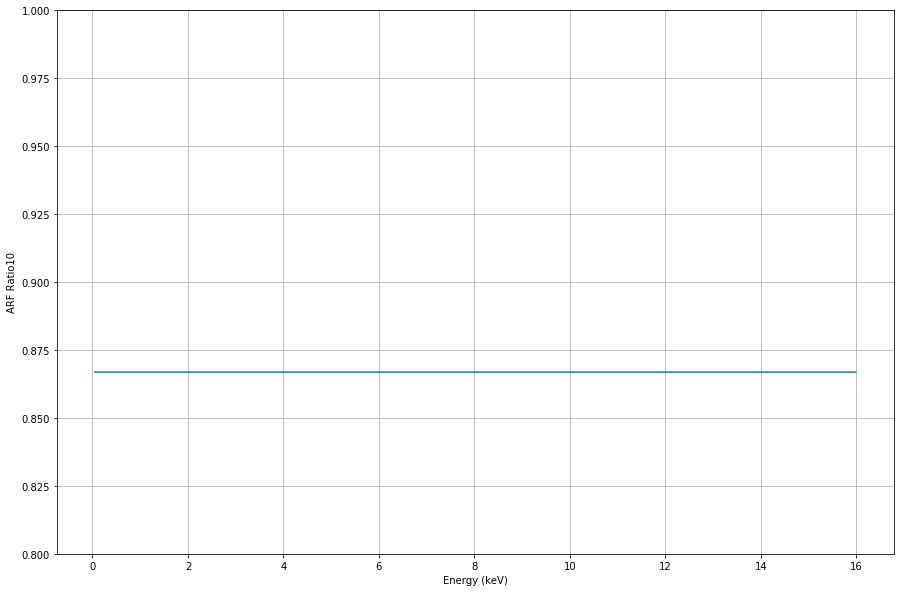

In [15]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(x0,ratio10,drawstyle='steps')
#ax.plot(x1,y1,drawstyle='steps')
#ax.set_xlim(xlim)
ax.set_ylim((0.8,1.0))
ax.set_xlabel("Energy (keV)")
ax.set_ylabel("ARF Ratio10")
ax.grid()


In [31]:
#
# check the eexpmap with much finer attrebin
#
# eexpmap imageset=pn_image_500_7000.fits attitudeset=0100_0097820101_AttHk.ds \
#    eventset=pn_evlist_clean.fits expimageset=pn_expimage_500_7000_test002.fits pimin=500 pimax=7000 attrebin=0.02
#
# check with usefastpixelisation=true
#
exp0 = fits.open(f'{wdir}/pn_expimage_500_7000.fits')
exp1 = fits.open(f'{wdir}/pn_expimage_500_7000_test002.fits')
#
mask0 = exp0[0].data > 0.0
xmask0 = np.zeros_like(exp0[0].data)
xmask0[np.where(mask0)] = 1
xmask1 = np.zeros_like(exp1[0].data)
mask1 = exp1[0].data > 0.0
xmask1[np.where(mask1)] = 1
#
masked = xmask0 + xmask1
image = exp0[0].data-exp1[0].data
print (np.min(image),np.max(image))
exp0[0].data = masked
exp0.writeto(f'{wdir}/expo_diffs.fits')

-955.1433 970.03125


In [19]:
import aplpy

INFO: Auto-setting vmin to -2.000e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.220e+00 [aplpy.core]


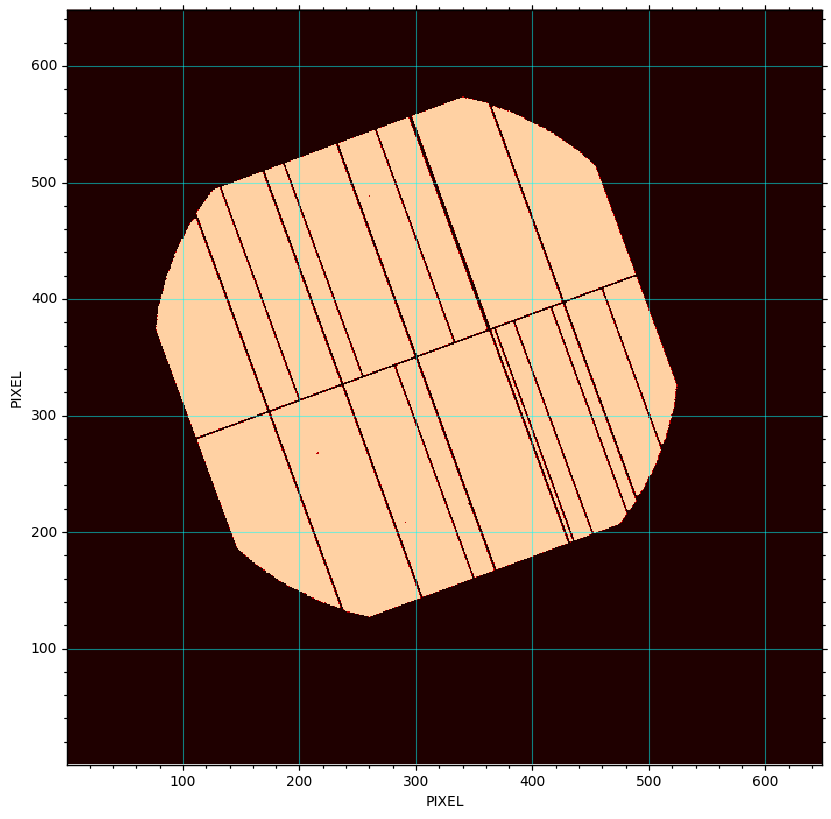

In [30]:
fig = plt.figure(figsize=(10,10),dpi=100)
f1 = aplpy.FITSFigure(masked, figure=fig)
f1.show_colorscale(cmap='gist_heat')
#f1.show_colorscale(stretch='log',cmap='gist_heat')
#f1.set_title(f"{my_target}: XMM EPIC-PN image in PPS band {my_band}")
#f1.tick_labels.set_xformat('hh:mm:ss.s')
#f1.tick_labels.set_yformat('dd:mm:ss')
f1.add_grid()
f1.grid.set_color('cyan')
f1.grid.set_alpha(0.5)

In [40]:
#
# make MOS1 count-rate (i.e. vignetting corrected) image
#
wdir = '/lhome/ivaltchanov/XMM-clusters/A1795/0097820101/proc'
hdu0 = fits.open(f'{wdir}/mos1_image_500_7000.fits')
hdu1 = fits.open(f'{wdir}/mos1_expimage_500_7000.fits')
#mask = hdu1[0].data > 0.0

In [42]:
cts = np.divide(hdu0[0].data,hdu1[0].data,where=(hdu1[0].data > 0.0))

In [44]:
hdu0[0].data = cts
hdu0.writeto(f'{wdir}/mos1_cts_500_7000.fits',overwrite=True)